# General Statistics

Just some stats lingos and methodology so I don't forget.

In [8]:
import numpy as np

# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html
mu, sigma = 0, 0.1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1000)
# Generate Distribution:
randomNums = np.random.normal(scale=3, size=100000)
randomInts = np.round(randomNums)


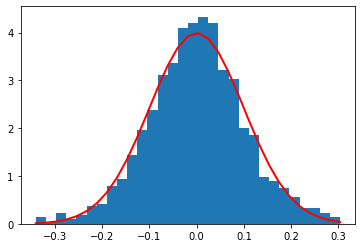

In [9]:
import matplotlib.pyplot as plt
import numpy as np

count, bins, ignored = plt.hist(s, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
         np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=2, color='r')

plt.show()

## Describing Data

In [10]:
from collections import Counter

# Mean
def mean(x):
    return(sum(x)/len(x))

# quantile.
def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]


# mod
def mode(x):
    c = Counter(x)
    return c.most_common(1)[0][0]


# below prints mean, median, and 75 percentile.
print(mean(randomInts), quantile(randomInts, 0.5), quantile(randomInts, 0.75))

-0.00183 -0.0 2.0


## Plot Normal Distribution

<BarContainer object of 27 artists>

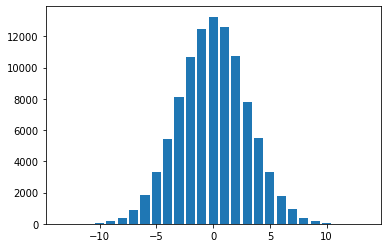

In [11]:

c = Counter(randomInts)
plt.bar(c.keys(), c.values())

## Dispersion
Measures of how spread out the data is.

$Variance =\frac{\sum_{i=0}^n(x_i-\bar{x})^2}{n-1}$ 

**Note** The reason why n-1 is that normally $\bar{x}$ is a sample mean which mean the avearge of deviation squared is an underestimate. See: https://en.wikipedia.org/wiki/Unbiased_estimation_of_standard_deviation


Standard Deivation is just square root of variance. This is because intuitive, SD is the same unit.

$s = \sqrt{\frac{\sum_{i=0}^n(x_i-\bar{x})^2}{n-1}}$

Both variance and stv will have outlier problems, a more robust alternative computes the difference between 25th and 75th percentile.

In [12]:
# range is the simplist 
def data_range(x):
    return max(x) - min(x)

# deviations from mean for each element
def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x] 

# variance is just the sum sqaned
def variance(x):
    n = len(x)
    deivations = de_mean(x)
    return sum([x_i**2 for x_i in x]) / (n - 1)

# standard deviation
def standard_dev(x):
    return np.sqrt(variance(x))

def interquartile_range(x): 
    return quantile (x , 0.75) - quantile (x , 0.25) 



print(data_range(randomInts), variance(randomInts), standard_dev(randomInts), interquartile_range(randomInts))

26.0 9.10050100501005 3.01670366542855 4.0


# Correlation

Covariance is the variance between pairs. This can be achieved by having dot product between deivations of the 2 varibles over n - 1

In [13]:
def covariance(x, y):
    n = len(x)
    return np.dot(de_mean(x), de_mean(y)) / (n - 1)   # recall variance is de_mean squared sum. (basically covariance of itself)

Correlation is basically the covariance divide by the product of respective stdard deivations. 

In [14]:
def correlation(x, y):
    return covariance(x, y)/ standard_dev(x)/standard_dev(y)

In [15]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples = 10, n_features=1, bias=4, noise=0.45)

In [16]:
print(covariance(X.reshape(10,), y), correlation(X.reshape(10,), y))

38.05208491113542 0.7593750279407036


## Caveats

Unlike covariance the unit do not make much sense, correlation is **unit less** and always lies between -1 (perfect anti-correlation) and 1 (perfect correlation). It is still subjected to outliers.

One suprise when analysing data is **Simpson's Paradox** in which correlation can be misleading when confounding varibles are ignored. Knowing data well is probably the only way of dealing with confonding factors.

Further reading: https://en.wikipedia.org/wiki/Confounding; https://en.wikipedia.org/wiki/Simpson's_paradox


- See example below also, correlation is 0, however, we can see a relationship between x and y where y = abs(x). Correlation give us information about how $x_i$ compared to $\bar{x}$ verses same for y but not any more details. 

- It also won''t tell us about how large thr relationship are. see second example, the samples are correlated but the relationship may not be interesting at all.

- Corrrelation and causation: famously *correlation is not causation*, its merely relationship between 2 variables. but not causal relationship

In [17]:
x = [-2, -1, 0, 1, 2]
y = [2, 1, 0, 1, 2]

print(correlation(x, y)) 

x1 = [-2, -1, 0, 1, 2]
y1 = [99.98, 99.99, 100, 100.01, 100.02]

print(correlation(x1, y1))

0.0
0.00014142135482308793


## R Squared

Coefficient of determination. It sthe proportaion of the differences between data points of variation from the mean, and variantion of the predicted value from the mean over the variation of the mean. It ranges between 0 and 1.

$R^2 = \frac{Var(mean)-Var(fitted line)}{Var(mean)}$


$R^2$ is a percentation variation difference compared to mean, in another words percentage data can be explained. (The relationship between 2 variables can explain x% of variation in the data) The larger the better

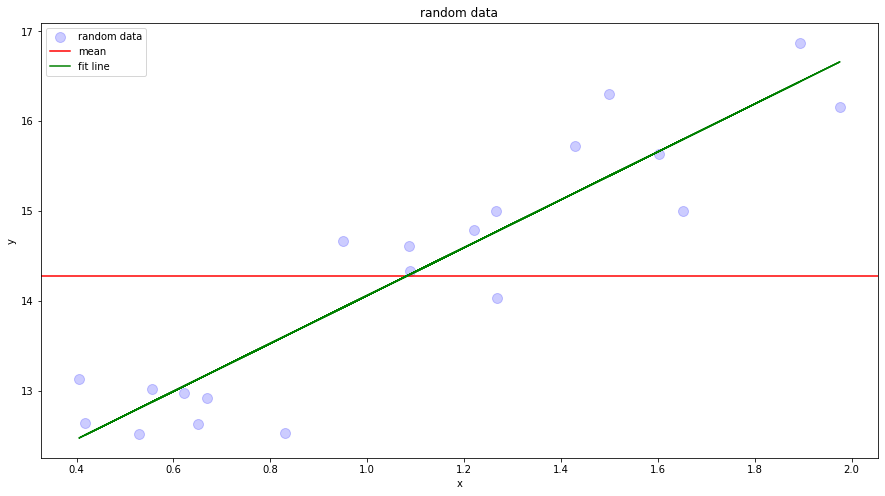

In [21]:
###import librarries
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

### - Generate random dataset with default size = 100 and intercept at around 5
### - Adding some noices around the line. 
### - Note the slope and intercept (As described above)
def generate_random_data(size = 100, intercept = 5, noise = True):
    X = 2 * np.random.rand(size, 1)
    y = 3 * X + intercept
    if noise:
      y = y + np.random.rand(size, 1) * intercept / 5
    return X, y

X, y = generate_random_data(size = 20, intercept = 10, noise = True)

from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X, y)
y2 = lr.predict(X)


### Visualise random data generated 
fig, ax = plt.subplots(1, 1)
fig.set_size_inches((15, 8))
ax.scatter(X, y, c = 'b', s = 100, alpha = 0.2, label="random data")
ax.axhline(y=np.mean(y), color='r', linestyle='-', label="mean")
ax.plot(X, y2, c = "g", label = "fit line")
ax.set_title("random data")
plt.xlabel('x')
plt.ylabel('y')
ax.legend()

plt.show()

In [28]:
var_y = variance(y)
y_mean = mean(y)
var_pred = np.sum([(y - y_i) ** 2 for y_i in y2])/(len(y2) - 1)

r_squared = (var_y - var_pred)/var_y

x_t = X.reshape(-1)
y_t = y.reshape(-1)

print(var_y, var_pred, r_squared, covariance(x_t, y_t), correlation(x_t, y_t))

[216.47081289] 74.17050397134817 [0.65736488] 0.6410300292397174 0.03594067924252039


# Probability

- P(E): probability given event E
- P(E, F): probability of two **independent** event E, F happens 
- P(E| F): Probabiliyty of event E happense given F happens, where E and F are dependent and F is not 0

In [20]:
import numpy

def coin_toss():
    return np.random.choice(["Heads", "Tails"])

for i in range(10):
    print(coin_toss())

Tails
Tails
Heads
Heads
Heads
Heads
Heads
Heads
Heads
Tails


In [24]:
# when using a larger sample, you can see probability are roughly 50% for each toss.

size = 10000

heads = 0
tails = 0

np.random.seed(0)

for _ in range(size):
    toss = coin_toss()
    if toss == "Heads":
        heads += 1
    else:
        tails += 1

print(f"#heads = {heads}\n#tails = {tails}")


#heads = 4915
#tails = 5085


## Conditional

All combos of two tosses

H H

H T

T H

T T

P(BH) = 1 / 4  # both head 
P(OH) = 3 / 4  # at least one head
P(H)  = 2 / 4  # first toss is a head

- What if we toss twice, what is the probabiliy both are heads, given the first toss is a head
    - P(BH | H) = P(BH, H) / P(H) = 0.25 / 0.5 = 0.5
    - Long version: P(first heads and second hards | first is head) = P(first heads + second heads AND first is heads) / P(first is head). Note how the first is heads probability is part of first heads, second heads. In fact if we know the first toss is a head, then scond toss is 50% heads anyway will work out the same.

- what if we toss twice, what is the probability both a heads, give at least one of the toss is a head. 
    - P(BH | OH) = P(BH, OH) / P(OH) = 0.25 / 0.75 = 1/3

**Note** P(H), probability first is head is contained without probability when both are heads.

In [27]:

# test the theory out

both_heads = 0
first_heads = 0
either_heads = 0

for _ in range(size):
    toss1 = coin_toss()
    toss2 = coin_toss()
    if toss1 == "Heads":
        first_heads += 1
    if toss1 == "Heads" or toss2 == "Heads":
        either_heads += 1
    if toss1 == "Heads" and toss2 == "Heads":
        both_heads += 1


print(both_heads/size, either_heads/size, first_heads/size)

print("P(BH |H):", both_heads/first_heads)
print("P(BH |OH):", both_heads/either_heads)


0.2521 0.7491 0.5018
P(BH |H): 0.5023913909924272
P(BH |OH): 0.3365371779468696


## Bayes's Theorem

$p(E|F) = \frac{p(E,F)}{p(F)}$

Since:
$p(E,F) = p(F, E) = p(F|E)p(E) = p(E|F)p(F)$

Therefore, if we know P(F|E)

$p(E|F) = \frac{p(F|E)p(E)}{p(F)}$

This is to solve when we want to find out propbability of E occurring on condition F, however only have information about probility of F occuring on condition E. 

It can be seen as the intersection (and) betwee p(E) and p(F) over p(F). where the intersection, can be seen as the probability of having F in the population of E times the probability of E. 

If we know under there are 350 people in a population of 1000 that are under 30, and out of the people there are 300 good, 50 defaulted. out of the whole population 900 are good

```
F = people under 30
E = people that are good

p(E| F) = probability of good given then are under 30

p(E, F) = both good and under 30 = 300 / 1000 = 0.3
p(F| E) = under 30, given good = 300 / 900 = 0.333
p(F) = under 30 = 350/1000 = 0.35
p(E) = good = 900/1000 = 0.9

p(F|E)p(E) = 0.333 * 0.9 = 0.3
```

**Note** how both way of calculating the denominator produce same results


## From a scorecard perspective (Naive Bayes)

$p(G|x) = \frac{p(x|G)p_G}{p(x)}$

Probability of Good, given attribute x, equals probability attribute x in Good, over probability of x. 
- Proportion of has attribute x vs good, times
- Proportion of Good vs all, over
- Proportion of attribute x vs all

For example:

- In sample population varible age bracket 30- has 300 Good, 50 Bad
- In total there are 1000 applications
- Out of 1000 application, 100 are bad


Therefore: 
$p(G|x) = \frac{\frac{300}{900}*\frac{900}{1000}}{\frac{350}{1000}}$ 

$p(G|x) = \frac{\frac{300}{900}* 900}{350}$ 

$p(G|x) = \frac{300}{350} = \frac{6}{7}$ 


There's more:
$p(B|x) = \frac{p(x|G)p_G}{p(x)}$

Therefore:

$\frac{p(G|x)}{p(B|x)}=\frac{(p(x|G)p_G)}{p(x|B)p_B}$

when we take log odds, we get a score:

$s(x) = ln(\frac{p(G|x)}{p(B|x)}) = ln(\frac{p_G}{p_B}) + ln(\frac{p(x|G)}{p(x|B)})$

where the first term is the **population odds** and the later, represented by x's are weights of evidence. If woe = 0 then this attribute does not impact overall score. if large positive then it is likely for the chance of having the attribute to be Good else Bad.


Same example:

$s_pop$ = ln(900/100) = 2.20
$woe(30-) = ln(\frac{300/900}{50/100}) = ln(2/3) = -0.41$

if there are other scores we can add them in. if there is just this attribute, the totalk score would be 1.79 (2.20 - 0.41)

**note** The assumption is that the attribute are independed of each other, which is often not in case of score card, therefore this way is not accurate. We often use logistic regrssion when dealing with scorecards.

## some algebra

- Probability of A and B are intersections of the 2 set of events. (P(A AND B) = P(A)P(B), if events are independent)
- Probability of A OR B are the union of the 2 set of events (P(A OR B) = P(A) + P(B) - P(A AND B))
- Probability of A given B is the intersection of A and B over B



## p value

p value is a value to test a hypothesis. If the value is very low, it is very unlikely for the null hypothesis is true. Therefore the greater the statistical significance of the observed difference

Typically anything lower than 0.05 is statistically significant. (reject null-hypothesis)



## Entropy & Cross Entropy

Entropy is a measure of randomness in an isolated system. Lower the entropy level, the more information we can draw conlusion from pieces of data. 

$E = p\log(\frac{1}{p}) = -p\log{(p)}$


Note that this function can be seen in decision tree quite a lot, to find the best attribute to split (see decision tree)

The cost function for logistic regression is also utilising this:
$
J(\theta) = \frac{-1}{m}\sum{i=1}^m(y^ilog(h_\theta(x^i) + (1-y^i)log(1-h_\theta(x^i)))
$

## Binomial Distribution

1. Fixed Number of Trails (n)
2. 2 possible outomes only (p, q) => ("success", "failure")
3. Each trail is **independent**

Any trail with 2, 3 characteristic is Bernoulli trail.

Example:

It has been stated that about 41% of adult workers have a high school diploma but do not pursue any further education. If 20 adult workers are randomly selected, find the probability that at most 12 of them have a high school diploma but do not pursue any further education. How many adult workers do you expect to have a high school diploma but do not pursue any further education?.

n = 20, p = 41%, q = 59%, X = [0..20], looking for $\mu$

Binomial Form: $X ~ (n, p)$

$X ~ (20, 0.41)$

8.0 4.8


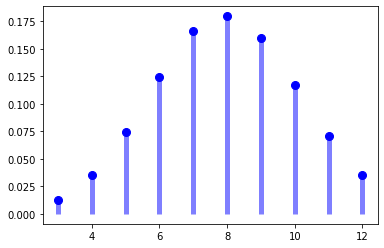

In [6]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1, 1)
n, p = 20, 0.4

mean, var, skew, kurt = binom.stats(n, p, moments='mvsk')

x = np.arange(binom.ppf(0.01, n, p),
              binom.ppf(0.99, n, p))

ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='binom pmf')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)

print(mean, var)

In [ ]:
p = 0
px = 0.41
for i in range(21):
    p += p ** i